# Ising Simulation

This class is written to accept $J$ matrices and perform 2D Ising simulations on  a square lattice with $N^2$ sites.



# Import functions and modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import fmin, minimize

from isingsim import IsingSim, compress_histogram, load_club_list, sd2_loss, loss_func


In [2]:
#Needed for histogram compression - a list of configurations to 'club together' due to symmetry
# You can define your own if you wish.
club_list = load_club_list('club_list.txt')

# Working Section

Here we define the model. We are going with a random bond model for nearest neighbors only. This is defined by scipy distributions to sample from

In [3]:
#define the model. You should supply a J_mat, like the one below

J_mat = [[0,0,0,0,0],
         [0,0.0,1.0,0,0],
         [0,1.0,0,1.0,0],
         [0,0,1.0,0,0],
         [0,0,0,0,0]
         ]

#Instantiate Model
ising_model =  IsingSim(N=20, J_mat = np.array(J_mat), save_trajectories=True, T = 2.5, 
                        eqSteps =500, mcSteps = 500)

## Run the simulation

It should take five minutes or so. Need to explore ways to speed this up. Cython should be promising.

In [4]:
ising_model.performIsingSim()

  1%|          | 4/500 [00:00<00:16, 30.68it/s]


---Performing Equlibration---



  0%|          | 2/500 [00:00<00:29, 16.83it/s]


---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:28<00:00, 18.97it/s]

Completed. Saving


'Completed simulation'

## Plot the results


Energy: -0.564860
Susceptibility: 7.856702 
Magnetization 0.336820 
Specific Heat: 0.264997



<BarContainer object of 32 artists>

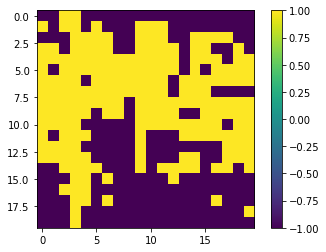

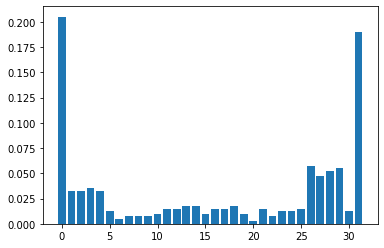

In [5]:
results = ising_model.results
print("\nEnergy: {0:2f}\nSusceptibility: {1:2f} \nMagnetization {2:2f} \nSpecific Heat: {3:2f}\n".format(
    results['Energy'], 
      results['Susceptibility'], 
      results['Magnetization'], 
      results['SpecificHeat']))

config = results['config']
histogram = results['Histogram']

plt.figure()
plt.imshow(config[-1,:,:])
plt.colorbar()

plt.figure(0)
plt.bar(np.arange(len(histogram)), histogram)

# Do some optimization

In [ ]:
#let's see if we can find this with optimization, starting with J = 0.55
#Here we use a Newton method

output = minimize(loss_func, x0 = [0.55], 
                  args = (ising_model.T,histogram, club_list), 
                  options = {'maxiter':3, 'disp':True, 'eps': 1E-1}, method = 'TNC', bounds = ((-1,1),))

  2%|▏         | 8/500 [00:00<00:14, 34.59it/s]

J value now is [0.8]

---Performing Equlibration---



  0%|          | 2/500 [00:00<00:27, 18.34it/s]


---Finished...
----Performing MC Moves----



  2%|▏         | 8/500 [00:00<00:14, 33.96it/s]

Completed. Saving
Current loss is 0.10379169469373899
J value now is [0.8]

---Performing Equlibration---



  1%|          | 3/500 [00:00<00:23, 21.44it/s]


---Finished...
----Performing MC Moves----



  1%|          | 4/500 [00:00<00:13, 35.58it/s]

Completed. Saving
Current loss is 0.13885265148490208
J value now is [0.9]

---Performing Equlibration---



  1%|          | 3/500 [00:00<00:23, 20.89it/s]


---Finished...
----Performing MC Moves----



  1%|          | 4/500 [00:00<00:13, 36.16it/s]

Completed. Saving
Current loss is 0.1345790155792584
J value now is [0.8]

---Performing Equlibration---



  1%|          | 3/500 [00:00<00:24, 20.51it/s]


---Finished...
----Performing MC Moves----



  2%|▏         | 8/500 [00:00<00:14, 34.09it/s]

Completed. Saving
Current loss is 0.1485655332240477
J value now is [0.8]

---Performing Equlibration---



  0%|          | 2/500 [00:00<00:25, 19.43it/s]


---Finished...
----Performing MC Moves----



  1%|          | 4/500 [00:00<00:15, 31.38it/s]

Completed. Saving
Current loss is 0.15657903203850748
J value now is [0.9]

---Performing Equlibration---



  0%|          | 2/500 [00:00<00:28, 17.29it/s]


---Finished...
----Performing MC Moves----



  2%|▏         | 8/500 [00:00<00:14, 33.63it/s]

Completed. Saving
Current loss is 0.1454451686464493
J value now is [0.97094544]

---Performing Equlibration---



  0%|          | 2/500 [00:00<00:25, 19.59it/s]


---Finished...
----Performing MC Moves----



  1%|          | 4/500 [00:00<00:14, 35.00it/s]

Completed. Saving
Current loss is 0.13157477819963553
J value now is [0.97094544]

---Performing Equlibration---



  0%|          | 2/500 [00:00<00:25, 19.56it/s]


---Finished...
----Performing MC Moves----



  2%|▏         | 8/500 [00:00<00:13, 35.54it/s]

Completed. Saving
Current loss is 0.11760541514564699
J value now is [1.07094544]

---Performing Equlibration---



  0%|          | 2/500 [00:00<00:24, 19.92it/s]


---Finished...
----Performing MC Moves----



  2%|▏         | 8/500 [00:00<00:14, 32.91it/s]

Completed. Saving
Current loss is 0.12442540276626066
J value now is [0.8]

---Performing Equlibration---



  0%|          | 2/500 [00:00<00:26, 18.95it/s]


---Finished...
----Performing MC Moves----



  1%|          | 4/500 [00:00<00:14, 34.09it/s]

Completed. Saving
Current loss is 0.17522018210627793
J value now is [0.8]

---Performing Equlibration---



  1%|          | 3/500 [00:00<00:23, 20.72it/s]


---Finished...
----Performing MC Moves----



  2%|▏         | 8/500 [00:00<00:14, 33.11it/s]

Completed. Saving
Current loss is 0.16489442443071475
J value now is [0.9]

---Performing Equlibration---



 67%|██████▋   | 334/500 [00:10<00:05, 31.52it/s]